1. 生成3d数据

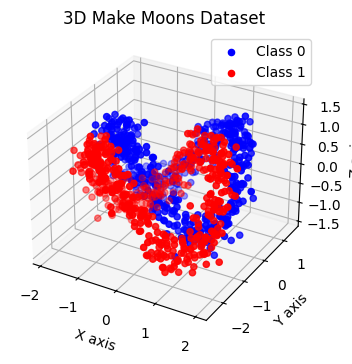

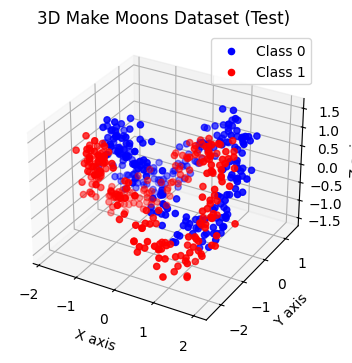

In [58]:
# Generating 3D make-moons data

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_moons_3d(n_samples=500, noise=0.1):
    # Generate the original 2D make_moons data
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)  # Adding a sinusoidal variation in the third dimension

    # Concatenating the positive and negative moons with an offset and noise
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

    # Adding Gaussian noise
    X += np.random.normal(scale=noise, size=X.shape)

    return X, y

# 生成训练数据
X_train, y_train = make_moons_3d(n_samples=500, noise=0.2)

# 生成测试数据
X_test, y_test = make_moons_3d(n_samples=250, noise=0.2)

# 可视化训练数据
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], X_train[y_train == 0][:, 2], c='blue', label='Class 0')
ax.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], X_train[y_train == 1][:, 2], c='red', label='Class 1')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Make Moons Dataset')
ax.legend()
plt.show()

# 可视化测试数据
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], X_test[y_test == 0][:, 2], c='blue', label='Class 0')
ax.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], X_test[y_test == 1][:, 2], c='red', label='Class 1')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Make Moons Dataset (Test)')
ax.legend()
plt.show()



2. 分类器训练与测试

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 决策树分类器
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# AdaBoost + 决策树分类器
ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)
ada_pred = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print(f"AdaBoost + Decision Tree Accuracy: {ada_accuracy:.4f}")

# SVM分类器
svm_kernels = ['linear', 'poly', 'rbf']
svm_results = {}

for kernel in svm_kernels:
    svm_clf = SVC(kernel=kernel, random_state=42)
    svm_clf.fit(X_train, y_train)
    svm_pred = svm_clf.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_pred)
    svm_results[kernel] = svm_accuracy
    print(f"SVM with {kernel} kernel Accuracy: {svm_accuracy:.4f}")



Decision Tree Accuracy: 0.9520
AdaBoost + Decision Tree Accuracy: 0.7280
SVM with linear kernel Accuracy: 0.6760
SVM with poly kernel Accuracy: 0.8560
SVM with rbf kernel Accuracy: 0.9660


3. 可视化分类结果

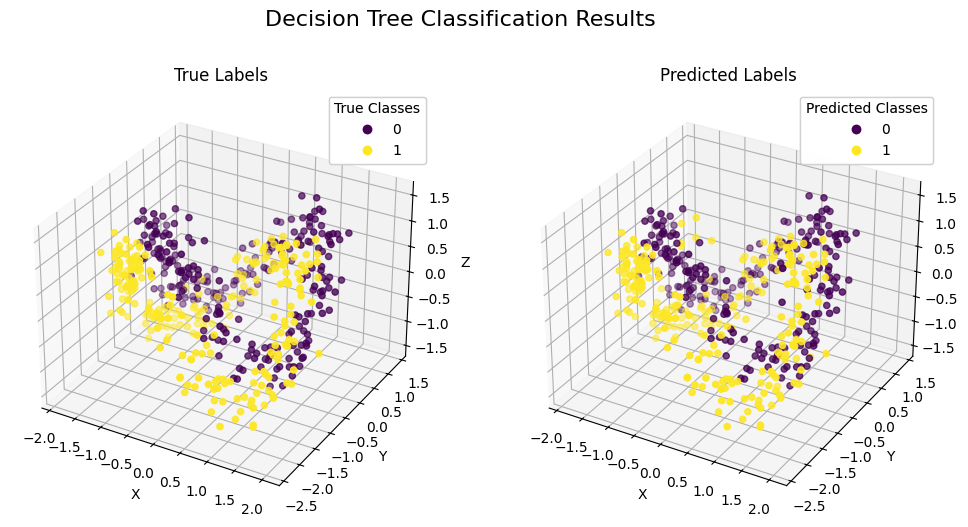

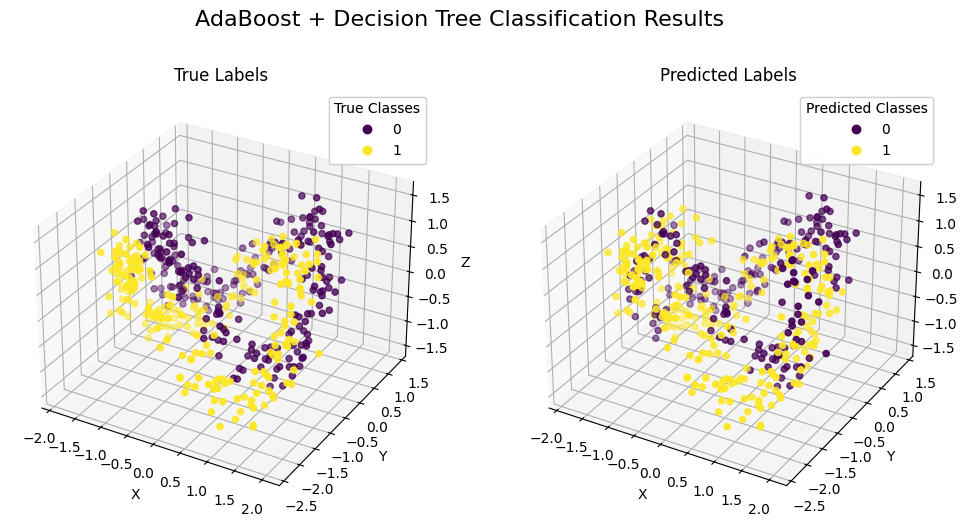

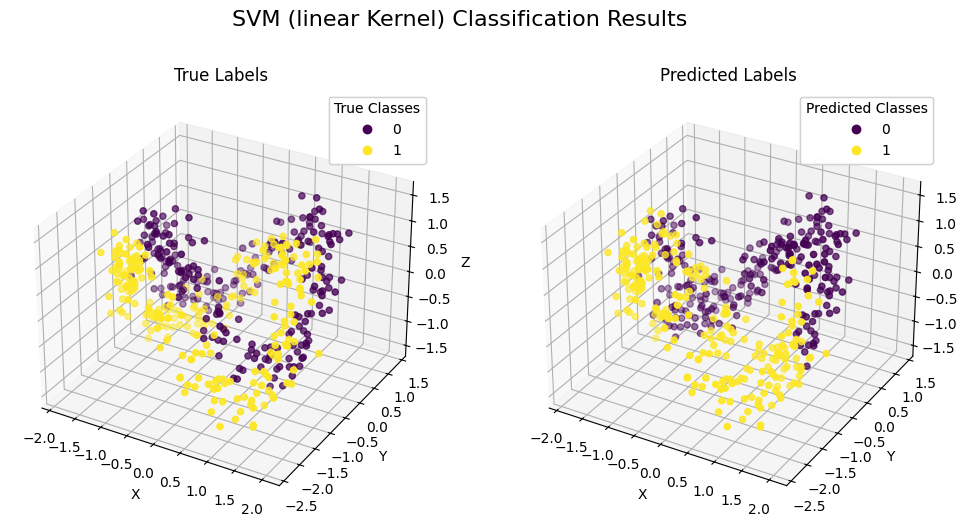

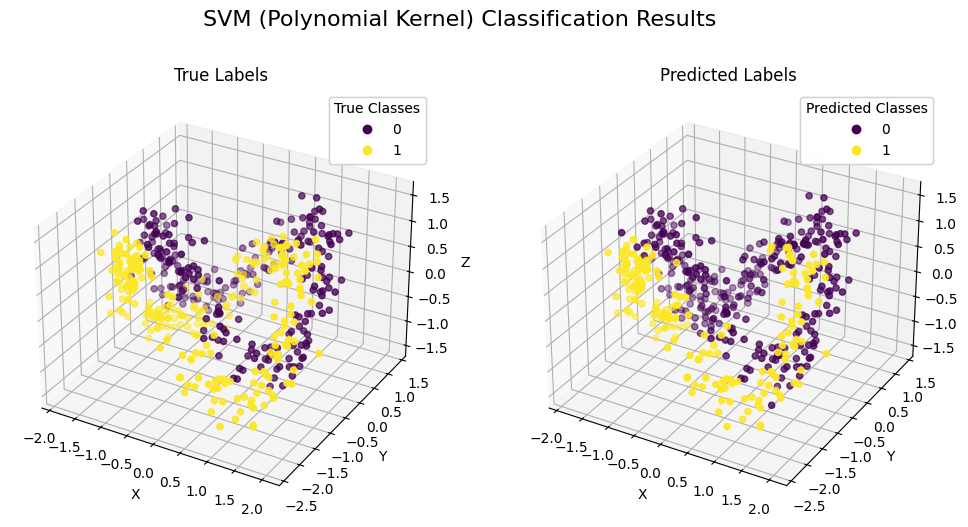

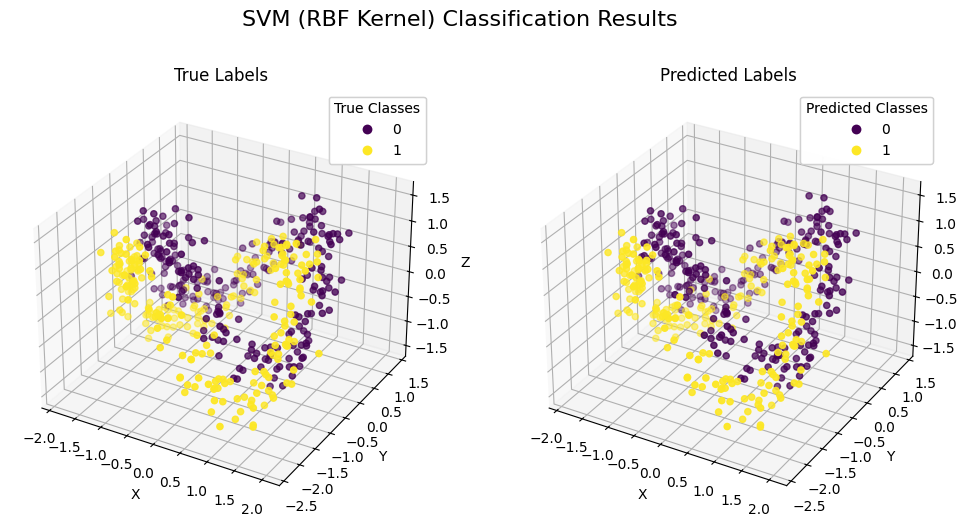

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_classification_results(X, y_true, y_pred, title):
    """
    可视化分类结果
    :param X: 测试数据特征
    :param y_true: 真实标签
    :param y_pred: 预测标签
    :param title: 图表标题
    """
    fig = plt.figure(figsize=(12, 6))

    # 绘制真实标签
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_true, cmap='viridis', marker='o')
    legend1 = ax1.legend(*scatter1.legend_elements(), title="True Classes")
    ax1.add_artist(legend1)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('True Labels')

    # 绘制预测标签
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred, cmap='viridis', marker='o')
    legend2 = ax2.legend(*scatter2.legend_elements(), title="Predicted Classes")
    ax2.add_artist(legend2)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title('Predicted Labels')

    # 添加总标题
    fig.suptitle(title, fontsize=16)
    plt.show()

# 使用决策树分类器的预测结果进行可视化
y_pred_dt = dt_clf.predict(X_test)
plot_classification_results(X_test, y_test, y_pred_dt, "Decision Tree Classification Results")

# 使用 AdaBoost + 决策树分类器的预测结果进行可视化
y_pred_ada = ada_clf.predict(X_test)
plot_classification_results(X_test, y_test, y_pred_ada, "AdaBoost + Decision Tree Classification Results")

# 使用 SVM (Linear Kernel) 分类器的预测结果进行可视化
svm_clf_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_clf_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_clf_linear.predict(X_test)
plot_classification_results(X_test, y_test, y_pred_svm_linear, "SVM (linear Kernel) Classification Results")

# 使用 SVM (Polynomial Kernel) 分类器的预测结果进行可视化
svm_clf_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svm_clf_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_clf_poly.predict(X_test)
plot_classification_results(X_test, y_test, y_pred_svm_poly, "SVM (Polynomial Kernel) Classification Results")

# 使用 SVM (RBF Kernel) 分类器的预测结果进行可视化
svm_clf_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_clf_rbf.predict(X_test)
plot_classification_results(X_test, y_test, y_pred_svm_rbf, "SVM (RBF Kernel) Classification Results")

